 **Анаитическая записка:**

https://www.notion.so/ds-club-pp/42f64f4b0adc46fc980254ce1535741e

### Импорт билиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Импорт данных

In [109]:
df_agg = pd.read_csv('data_agg_final.csv', delimiter=',')
df = pd.read_csv('data_raw_final.csv', delimiter=',')

### Предобработка

In [110]:
df.drop('День недели', axis= 1 , inplace= True )
df.drop('Неделя', axis= 1 , inplace= True )
df.drop('Месяц', axis= 1 , inplace= True )
df.drop('Год', axis= 1 , inplace= True )
df.drop('Unnamed: 0', axis= 1 , inplace= True )

df['Сумма по чеку, руб.'] = pd.to_numeric(df['Сумма по чеку, руб.'], errors='coerce')
df['Открыт_дата'] = pd.to_datetime(df['Открыт_дата'], dayfirst=True)
df['Открыт_время'] = pd.to_datetime(df['Открыт_время'])
df['Средняя Температура'] = pd.to_numeric(df['Средняя Температура'], errors='coerce')
df['Средняя Температура'] = df['Средняя Температура'].round()
df['Открыт'] = pd.to_datetime(df['Открыт'])
df['Осадки'] = (df['Снег'] | df['Дождь']).astype(int)

df_agg.drop('Unnamed: 0', axis= 1 , inplace= True )
df_agg['Сумма по чеку, руб.'] = pd.to_numeric(df['Сумма по чеку, руб.'], errors='coerce')
df_agg['Открыт_дата'] = pd.to_datetime(df['Открыт_дата'], dayfirst=True)
#df_agg['Средняя Температура'] = pd.to_numeric(df['Средняя Температура'], errors='coerce') [-1. -0.  1.  4.]
#df_agg['Средняя Температура'] = df['Средняя Температура'].round()
df_agg['Открыт_дата'] = pd.to_datetime(df_agg['Открыт_дата'])

In [111]:
# Создаем временнные ряды
df['День_недели'] = df['Открыт_дата'].dt.date
df['Неделя'] = df['Открыт_дата'].dt.to_period('W')
df['Месяц'] = df['Открыт_дата'].dt.to_period('M')
df['Год'] = df['Открыт_дата'].dt.year

### Аналитика

#### Детализированный Датафрейм

Интересные факты

In [88]:
closed_days = df[df['Сумма по чеку, руб.'].isnull()]

# Вывод результата
print("Дни, когда кофейня была закрыта:")
print(closed_days[['Открыт_дата', 'Открыт_время']])

Дни, когда кофейня была закрыта:
Empty DataFrame
Columns: [Открыт_дата, Открыт_время]
Index: []


In [113]:
all_days = pd.date_range(start=df['Открыт_дата'].min(), end=df['Открыт_дата'].max(), freq='D').date

# Находим дни, когда кофейня была закрыта (не было данных в эти дни)
closed_days = set(all_days) - set(df['Открыт_дата'])

# Вывод результата в более читаемом виде
print("Дни, когда кофейня была закрыта (не было данных):")
for day in closed_days:
    print(day)

Дни, когда кофейня была закрыта (не было данных):
2022-12-08
2023-05-26
2023-09-25
2023-07-30
2023-04-17
2023-04-02
2023-08-12
2022-10-19
2023-10-21
2022-09-22
2023-03-15
2022-12-11
2022-12-06
2023-04-28
2022-12-23
2023-05-09
2023-06-26
2023-02-28
2023-05-10
2023-08-09
2023-07-19
2023-05-20
2023-03-03
2023-04-16
2023-05-30
2023-09-11
2023-01-27
2023-07-29
2023-02-16
2022-11-21
2023-07-22
2022-09-11
2023-04-24
2023-10-19
2023-06-19
2023-02-12
2023-01-13
2023-10-18
2022-09-03
2023-05-14
2022-11-13
2022-09-04
2023-06-13
2023-01-14
2023-02-10
2023-07-24
2023-01-05
2023-05-05
2022-11-14
2022-10-15
2022-10-21
2023-09-21
2023-09-28
2023-05-04
2023-01-08
2022-11-06
2022-12-12
2023-05-29
2023-04-22
2022-10-10
2023-09-22
2022-11-02
2023-03-17
2022-11-04
2022-12-25
2022-09-21
2023-03-01
2023-03-08
2022-09-17
2023-03-19
2023-06-16
2022-11-10
2023-10-13
2023-02-01
2023-07-05
2023-03-22
2023-01-18
2023-09-24
2023-08-22
2022-09-30
2023-06-30
2022-09-07
2023-08-23
2023-03-30
2023-04-14
2023-02-14
2022

In [112]:
# Создание полного списка календарных дней
all_days = pd.date_range(start=df['Открыт_дата'].min(), end=df['Открыт_дата'].max(), freq='D').date

# Находим дни, когда кофейня была закрыта (не было данных в эти дни)
closed_days = set(all_days) - set(df['Открыт_дата'])

# Преобразование множества в список для более читаемого вывода
closed_days_list = list(closed_days)

# Вывод количества закрытых дней
print("Количество дней, когда кофейня была закрыта (не было данных):", len(closed_days_list))

Количество дней, когда кофейня была закрыта (не было данных): 421


In [107]:
# Находим дни, когда кофейня была закрыта (не было данных в эти дни)
closed_days = set(all_days) - set(df['Открыт_дата'])

# Преобразование множества в список для более читаемого вывода
closed_days_list = list(closed_days)

# Вывод результата в виде списка
print("Дни, когда кофейня была закрыта (не было данных):")
print(closed_days_list)

Дни, когда кофейня была закрыта (не было данных):
[datetime.date(2022, 12, 8), datetime.date(2023, 5, 26), datetime.date(2023, 9, 25), datetime.date(2023, 7, 30), datetime.date(2023, 4, 17), datetime.date(2023, 4, 2), datetime.date(2023, 8, 12), datetime.date(2022, 10, 19), datetime.date(2023, 10, 21), datetime.date(2022, 9, 22), datetime.date(2023, 3, 15), datetime.date(2022, 12, 11), datetime.date(2022, 12, 6), datetime.date(2023, 4, 28), datetime.date(2022, 12, 23), datetime.date(2023, 5, 9), datetime.date(2023, 6, 26), datetime.date(2023, 2, 28), datetime.date(2023, 5, 10), datetime.date(2023, 8, 9), datetime.date(2023, 7, 19), datetime.date(2023, 5, 20), datetime.date(2023, 3, 3), datetime.date(2023, 4, 16), datetime.date(2023, 5, 30), datetime.date(2023, 9, 11), datetime.date(2023, 1, 27), datetime.date(2023, 7, 29), datetime.date(2023, 2, 16), datetime.date(2022, 11, 21), datetime.date(2023, 7, 22), datetime.date(2022, 9, 11), datetime.date(2023, 4, 24), datetime.date(2023, 10, 

In [104]:
last_order_time_per_day = df.groupby('Открыт_дата')['Открыт_время'].max()

# Выбор дней, когда кофейня закрывалась раньше 17:00 (последний заказ был до 17:00)
early_closing_days = last_order_time_per_day[last_order_time_per_day.dt.hour < 24]

# Вывод результата
print("Дни, когда кофейня закрывалась раньше (последний заказ до 17:00):")
print(early_closing_days.reset_index())

Дни, когда кофейня закрывалась раньше (последний заказ до 17:00):
    Открыт_дата        Открыт_время
0    2022-09-01 2024-02-12 22:08:00
1    2022-09-02 2024-02-12 20:36:00
2    2022-09-03 2024-02-12 21:54:00
3    2022-09-04 2024-02-12 21:34:00
4    2022-09-05 2024-02-12 21:10:00
..          ...                 ...
415  2023-10-22 2024-02-12 21:52:00
416  2023-10-23 2024-02-12 20:41:00
417  2023-10-24 2024-02-12 21:43:00
418  2023-10-25 2024-02-12 21:46:00
419  2023-10-26 2024-02-12 19:39:00

[420 rows x 2 columns]


In [83]:
# Группируем
day_count = df.groupby('День').size()
daily_count = df.groupby('День_недели').size()
weekly_count = df.groupby('Неделя').size()
monthly_count = df.groupby('Месяц').size()

График общего **количества чеков** по дням, по всем дням, неделям, месяцам

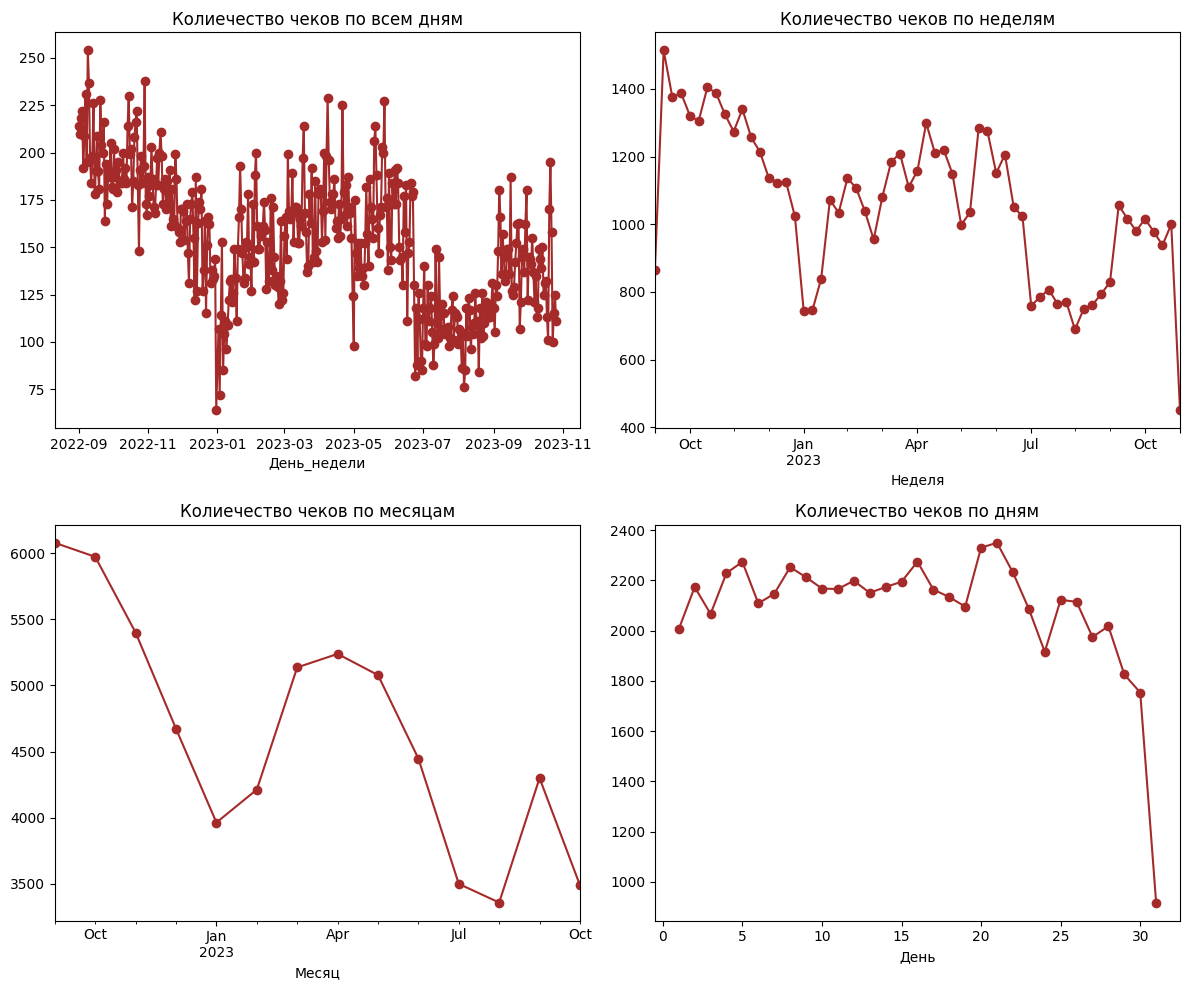

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

daily_count.plot(ax=axes[0, 0], title='Колиечество чеков по всем дням', marker='o', color='brown')
weekly_count.plot(ax=axes[0, 1], title='Колиечество чеков по неделям', marker='o', color='brown')
monthly_count.plot(ax=axes[1, 0], title='Колиечество чеков по месяцам', marker='o', color='brown')
day_count.plot(ax=axes[1, 1], title='Колиечество чеков по дням', marker='o', color='brown')

plt.tight_layout()
plt.show()

**Гистограмма количества чеков по неделям, месяцам**

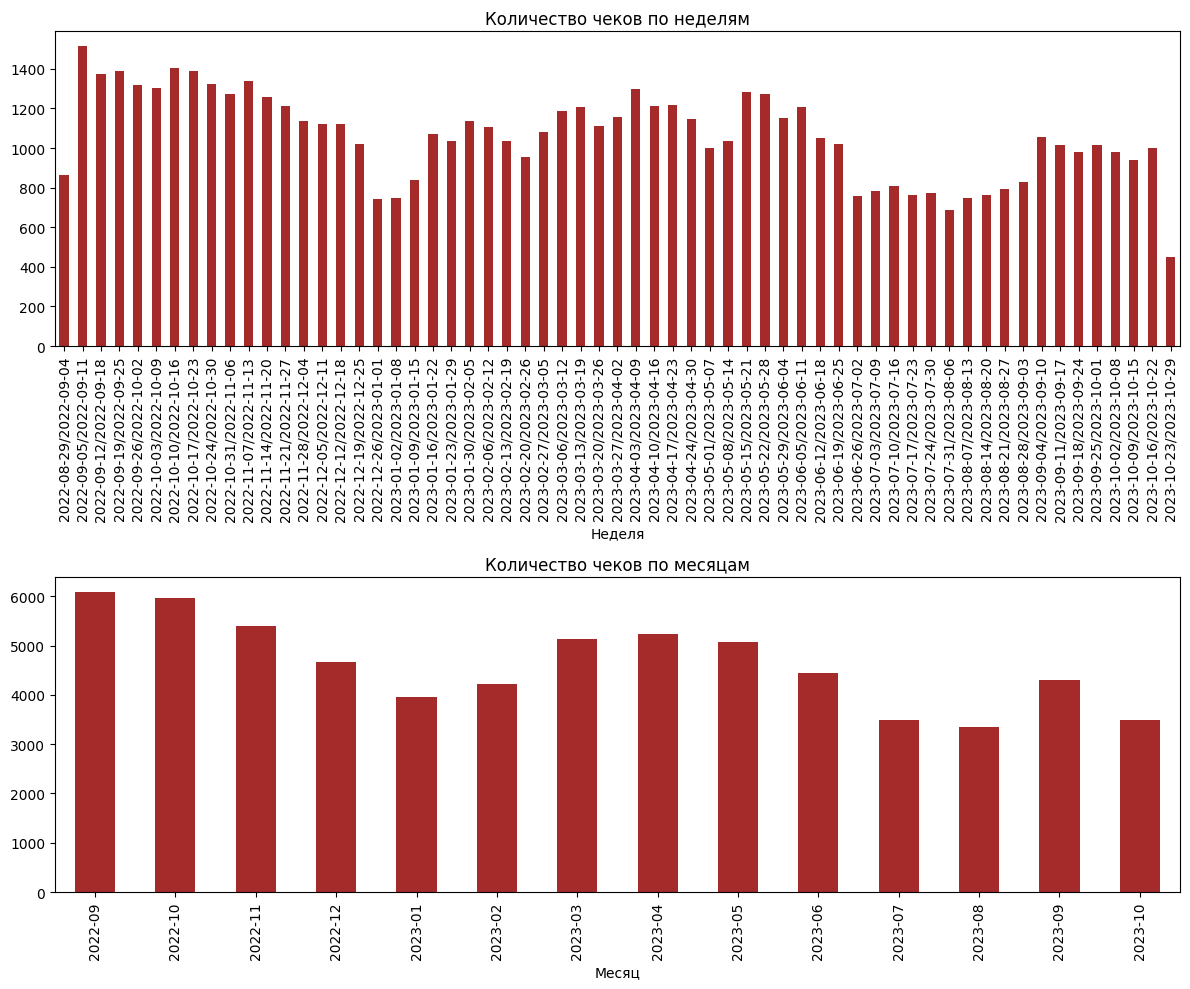

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

weekly_count.plot(ax=axes[0], kind='bar', title='Количество чеков по неделям', color='brown')
monthly_count.plot(ax=axes[1], kind='bar', title='Количество чеков по месяцам', color='brown')

plt.tight_layout()
plt.show()

**Количество заказов по месяцам**

In [8]:
monthly_total_count = df.groupby('Месяц').size()

for month, count, in monthly_total_count.items():
  print(f"{month} - {count}")

2022-09 - 6078
2022-10 - 5972
2022-11 - 5399
2022-12 - 4672
2023-01 - 3963
2023-02 - 4212
2023-03 - 5136
2023-04 - 5238
2023-05 - 5078
2023-06 - 4447
2023-07 - 3499
2023-08 - 3358
2023-09 - 4299
2023-10 - 3489


**Средний чек за все время**

In [9]:
average_check_total = df['Сумма по чеку, руб.'].mean()
print(f'Средний чек за все время: {average_check_total:.2f} руб.')

Средний чек за все время: 576.48 руб.


**Средний чек по месяцам**

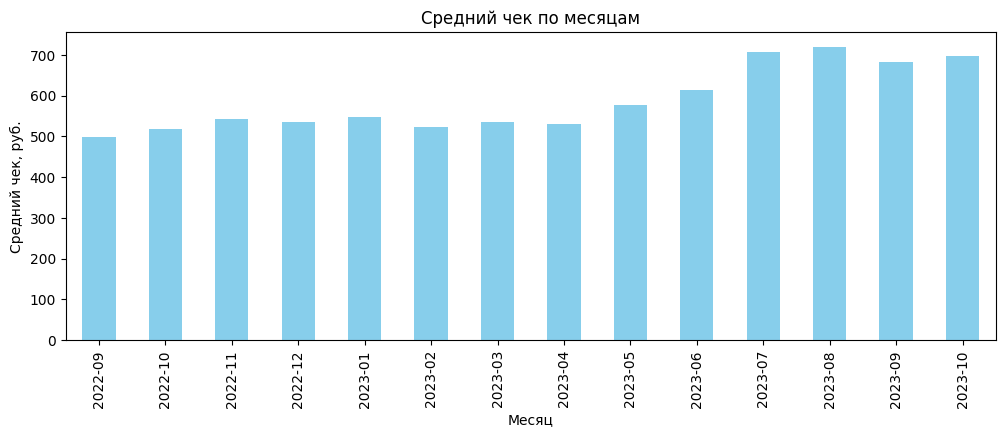

In [10]:
average_check_by_month = df.groupby(df['Открыт'].dt.to_period('M'))['Сумма по чеку, руб.'].mean()

plt.figure(figsize=(12, 4))
average_check_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Средний чек, руб.')
plt.title('Средний чек по месяцам')
plt.show()

**Средний чек по неделям**

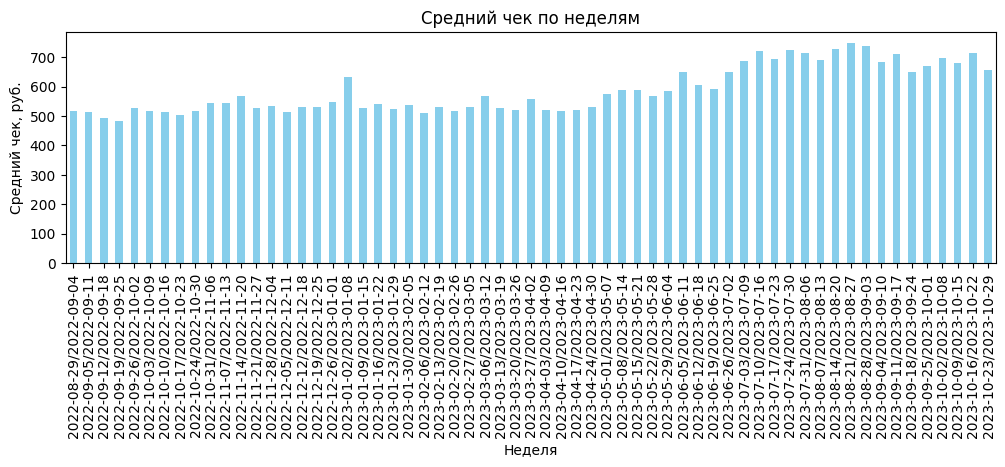

In [11]:
average_check_by_week = df.groupby(df['Открыт'].dt.to_period('W'))['Сумма по чеку, руб.'].mean()

plt.figure(figsize=(12, 3))
average_check_by_week.plot(kind='bar', color='skyblue')
plt.xlabel('Неделя')
plt.ylabel('Средний чек, руб.')
plt.title('Средний чек по неделям')
plt.show()

**Среднее количество чеков по дням недели**

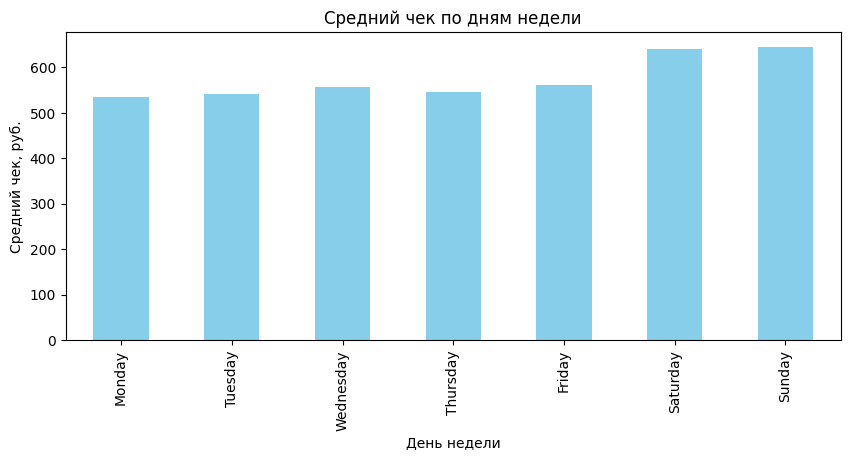

In [12]:
average_check_by_day_of_week = df.groupby(df['Открыт'].dt.day_name())['Сумма по чеку, руб.'].mean()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_check_by_day_of_week = average_check_by_day_of_week.reindex(ordered_days)

plt.figure(figsize=(10, 4))
average_check_by_day_of_week.plot(kind='bar', color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Средний чек, руб.')
plt.title('Средний чек по дням недели')
plt.show()

**Средний чек в разное время**

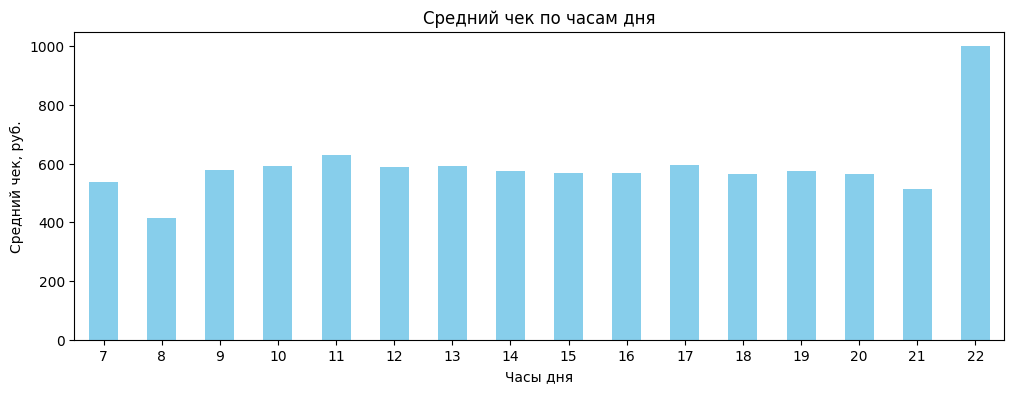

In [13]:
average_check_by_hour = df.groupby(df['Открыт'].dt.hour)['Сумма по чеку, руб.'].mean()

plt.figure(figsize=(12, 4))
average_check_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Часы дня')
plt.ylabel('Средний чек, руб.')
plt.title('Средний чек по часам дня')
plt.xticks(rotation=0)
plt.show()

**Средний чек в неделю с ЗП или без ЗП**

In [14]:
average_check_by_salary = df.groupby('ЗП')['Сумма по чеку, руб.'].mean()

average_check_with_salary = average_check_by_salary.loc[1]
average_check_without_salary = average_check_by_salary.loc[0]

print("Средний чек, когда было ЗП:", average_check_with_salary)
print("Средний чек, когда ЗП не было:", average_check_without_salary)

Средний чек, когда было ЗП: 574.7074599610836
Средний чек, когда ЗП не было: 577.2735069312677


**Среднее количество закзаов в неделю с ЗП и без**

In [15]:
count_order_per_week = df.groupby(df['ЗП'].gt(0).astype(str))['Открыт'].count()
print(count_order_per_week)


ЗП
False    44797
True     20043
Name: Открыт, dtype: int64


**Количество чеков и температура**

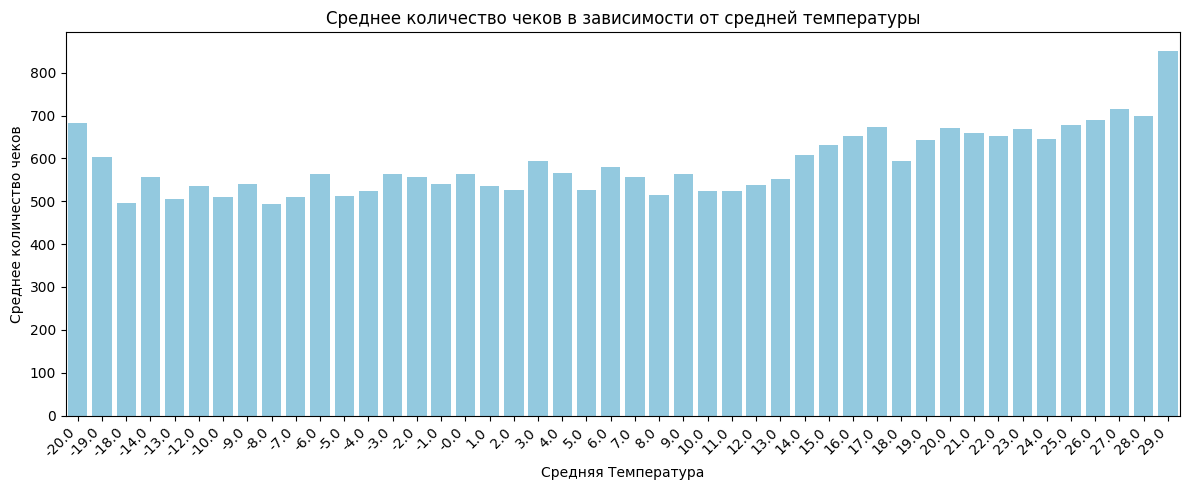

In [16]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Средняя Температура', y='Сумма по чеку, руб.', data=df.groupby('Средняя Температура')['Сумма по чеку, руб.'].mean().reset_index(), color='skyblue')
plt.title('Среднее количество чеков в зависимости от средней температуры')
plt.xlabel('Средняя Температура')
plt.ylabel('Среднее количество чеков')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Количество чеков и время**

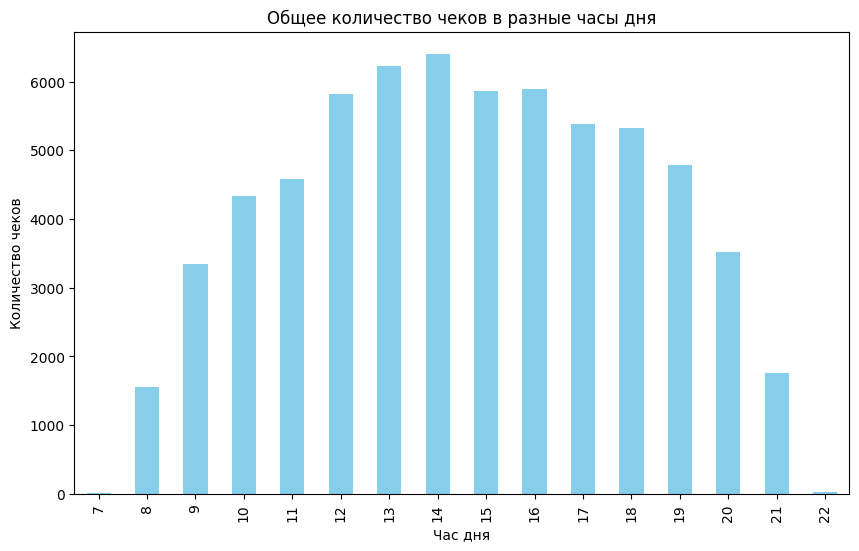

In [17]:
plt.figure(figsize=(10, 6))
df.groupby(df['Открыт_время'].dt.hour).size().plot(kind='bar', color='skyblue')
plt.title('Общее количество чеков в разные часы дня')
plt.xlabel('Час дня')
plt.ylabel('Количество чеков')
plt.show()

#### Агрегированный датафрейм

**Количество чеков и праздники**

**Среднее количество чеков**

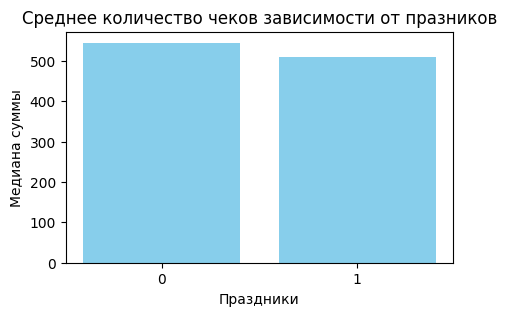

In [18]:
median_by_holiday = df_agg.groupby('Праздники')['Сумма по чеку, руб.'].median()

plt.figure(figsize=(5, 3))
plt.bar(median_by_holiday.index.astype(str), median_by_holiday, color='skyblue')
plt.xlabel('Праздники')
plt.ylabel('Медиана суммы')
plt.title('Среднее количество чеков зависимости от празников')
plt.show()

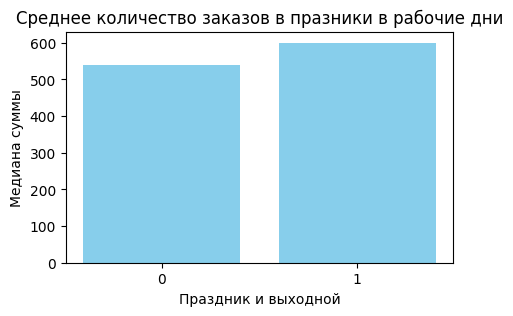

In [19]:
median_by_holiday_no_weekend = df_agg.groupby('Праздник_раб')['Сумма по чеку, руб.'].median()

plt.figure(figsize=(5, 3))
plt.bar(median_by_holiday_no_weekend.index.astype(str), median_by_holiday_no_weekend, color='skyblue')
plt.xlabel('Праздник и выходной')
plt.ylabel('Медиана суммы')
plt.title('Среднее количество заказов в празники в рабочие дни')
plt.show()

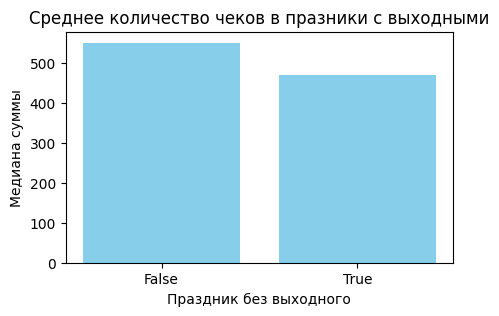

In [20]:
median_by_holiday_weekend = df_agg.groupby('Праздник_вых')['Сумма по чеку, руб.'].median()

plt.figure(figsize=(5, 3))
plt.bar(median_by_holiday_weekend.index.astype(str), median_by_holiday_weekend, color='skyblue')
plt.xlabel('Праздник без выходного')
plt.ylabel('Медиана суммы')
plt.title('Среднее количество чеков в празники с выходными')
plt.show()

**Зарплата**

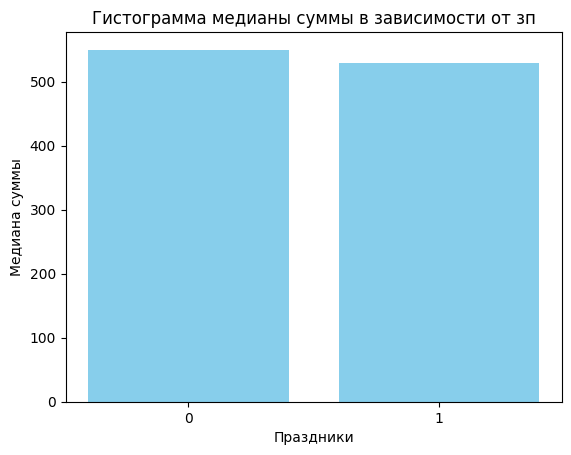

In [21]:
median_by_salary = df_agg.groupby('ЗП')['Сумма по чеку, руб.'].median()

plt.bar(median_by_salary.index.astype(str), median_by_salary, color='skyblue')
plt.xlabel('Праздники')
plt.ylabel('Медиана суммы')
plt.title('Гистограмма медианы суммы в зависимости от зп')
plt.show()

**Время года(0-зима, 1-весна, 2-лето, 3-осень)**

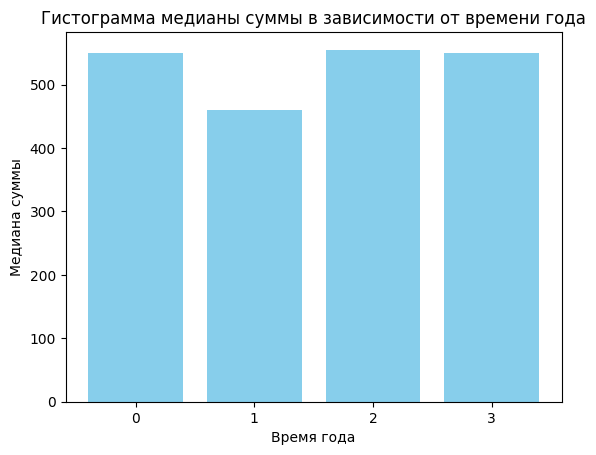

In [22]:
median_by_season = df_agg.groupby('Время года')['Сумма по чеку, руб.'].median()

plt.bar(median_by_season.index.astype(str), median_by_season, color='skyblue')
plt.xlabel('Время года')
plt.ylabel('Медиана суммы')
plt.title('Гистограмма медианы суммы в зависимости от времени года')
plt.show()

**Снег(0-нет снега, 1 -есть)**

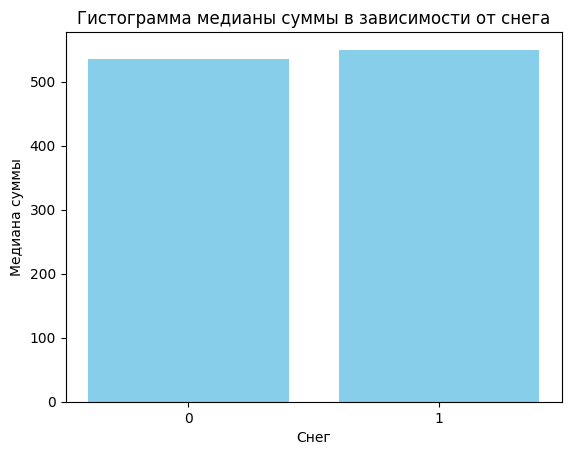

In [23]:
median_by_snow = df_agg.groupby('Снег')['Сумма по чеку, руб.'].median()

plt.bar(median_by_snow.index.astype(str), median_by_snow, color='skyblue')
plt.xlabel('Снег')
plt.ylabel('Медиана суммы')
plt.title('Гистограмма медианы суммы в зависимости от снега')
plt.show()

**Дождь**

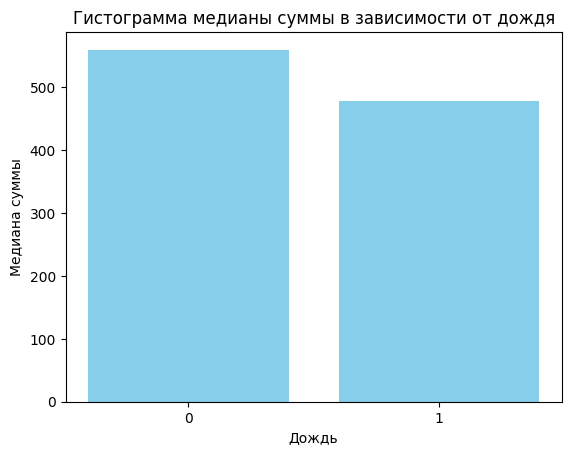

In [24]:
median_by_rain = df_agg.groupby('Дождь')['Сумма по чеку, руб.'].median()

plt.bar(median_by_rain.index.astype(str), median_by_rain, color='skyblue')
plt.xlabel('Дождь')
plt.ylabel('Медиана суммы')
plt.title('Гистограмма медианы суммы в зависимости от дождя')
plt.show()

**Среднее количество чеков в дни с осадками и без**

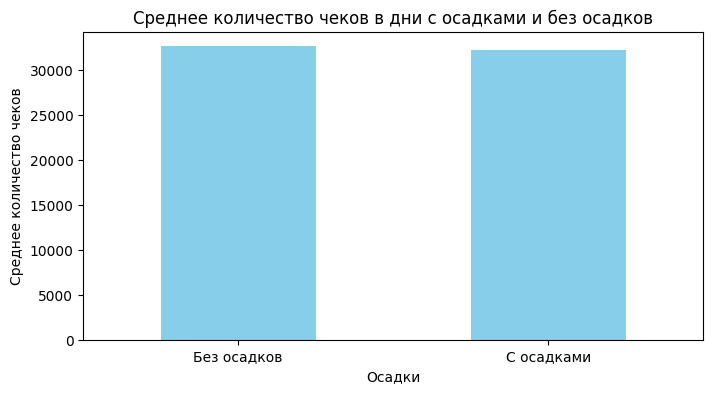

In [25]:
average_checks_by_precipitation = df.groupby('Осадки')['Сумма по чеку, руб.'].count()

plt.figure(figsize=(8, 4))
average_checks_by_precipitation.plot(kind='bar', color='skyblue')
plt.xlabel('Осадки')
plt.ylabel('Среднее количество чеков')
plt.title('Среднее количество чеков в дни с осадками и без осадков')
plt.xticks([0, 1], ['Без осадков', 'С осадками'], rotation=0)
plt.show()

**Средний чек в дни с осадками и без**

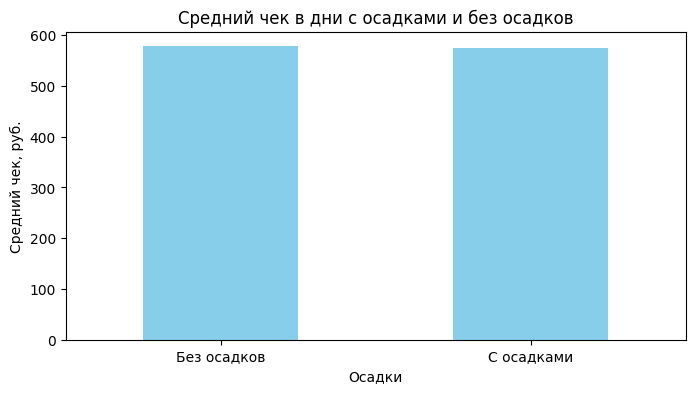

In [26]:
average_check_by_precipitation = df.groupby('Осадки')['Сумма по чеку, руб.'].mean()

plt.figure(figsize=(8, 4))
average_check_by_precipitation.plot(kind='bar', color='skyblue')
plt.xlabel('Осадки')
plt.ylabel('Средний чек, руб.')
plt.title('Средний чек в дни с осадками и без осадков')
plt.xticks([0, 1], ['Без осадков', 'С осадками'], rotation=0)
plt.show()

**Сумма выручки по месяцам, годам**

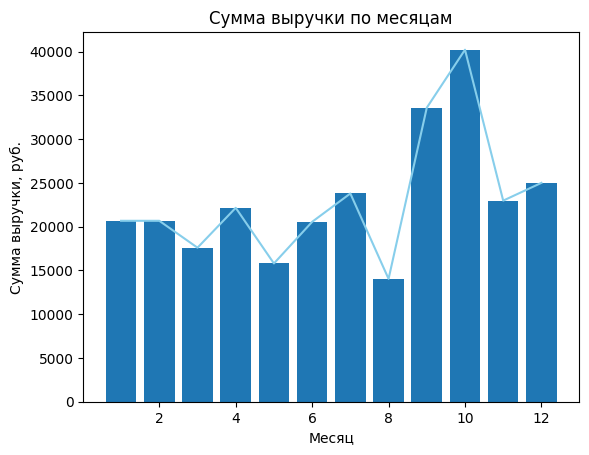

In [27]:
сумма_выручки_по_месяцам = df_agg.groupby('Месяц')['Сумма по чеку, руб.'].sum()

сумма_выручки_по_месяцам.plot(color='skyblue')
plt.bar(сумма_выручки_по_месяцам.index, сумма_выручки_по_месяцам.values)
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки, руб.')
plt.title('Сумма выручки по месяцам')
plt.show()

**Средняя сумма выручки от дня недели**

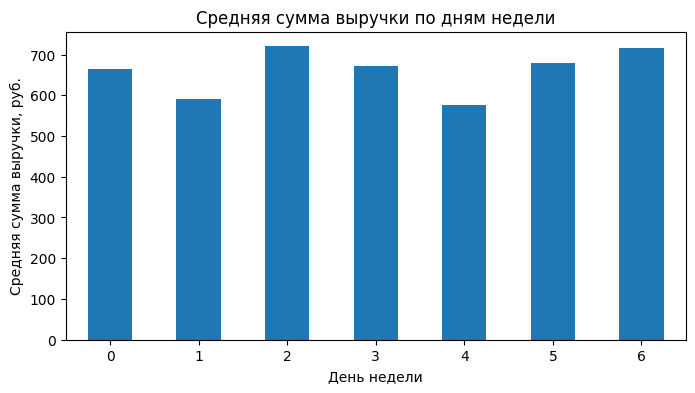

In [28]:
import matplotlib.pyplot as plt

# Группировка данных по дню недели и вычисление средней суммы выручки
avg_revenue_by_weekday = df_agg.groupby('День недели')['Сумма по чеку, руб.'].mean()

# Определение порядка дней недели
weekday_order = [0, 1, 2, 3, 4, 5, 6]

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
avg_revenue_by_weekday.reindex(weekday_order).plot(kind='bar')
plt.title('Средняя сумма выручки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя сумма выручки, руб.')
plt.xticks(rotation=0)
plt.show()

**Средняя сумма выручки от номера недели в месяце**

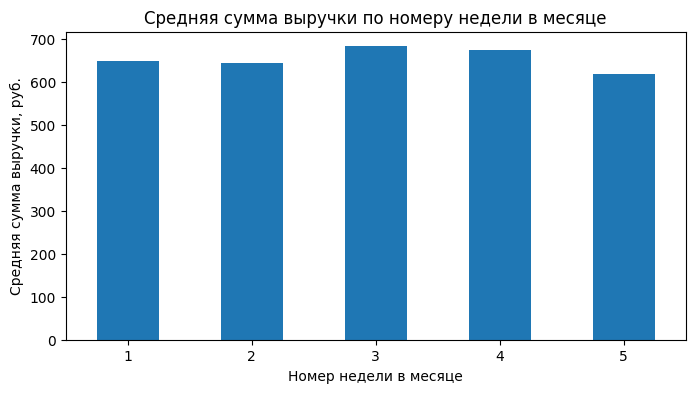

In [29]:
avg_revenue_by_week = df_agg.groupby('Неделя')['Сумма по чеку, руб.'].mean()

plt.figure(figsize=(8, 4))
avg_revenue_by_week.plot(kind='bar')
plt.title('Средняя сумма выручки по номеру недели в месяце')
plt.xlabel('Номер недели в месяце')
plt.ylabel('Средняя сумма выручки, руб.')
plt.xticks(rotation=0)
plt.show()


**Средняя сумма выручки от температуры**

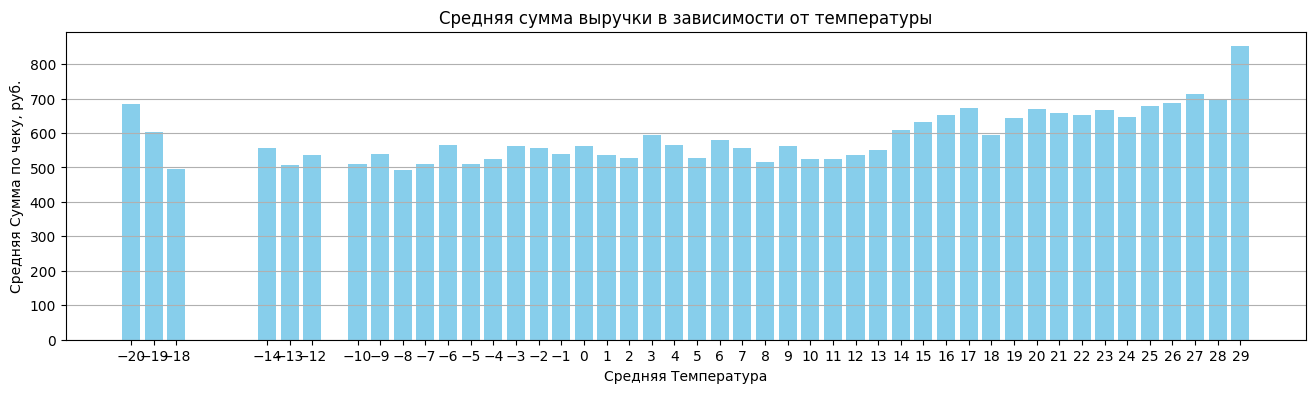

In [57]:
df_agg = df.groupby('Средняя Температура')['Сумма по чеку, руб.'].mean().reset_index()

plt.figure(figsize=(16, 4))
bars = plt.bar(df_agg['Средняя Температура'], df_agg['Сумма по чеку, руб.'], color='skyblue')
plt.xlabel('Средняя Температура')
plt.ylabel('Средняя Сумма по чеку, руб.')
plt.title('Средняя сумма выручки в зависимости от температуры')
plt.grid(axis='y')
plt.xticks(df_agg['Средняя Температура'])
plt.show()

**Средняя сумма выручки от снега, дождя, отсутствия осадков**

In [58]:
df_agg_rain = df[df['Дождь'] == 1].groupby('Дождь')['Сумма по чеку, руб.'].mean()
df_agg_no_rain = df[df['Дождь'] == 0].groupby('Дождь')['Сумма по чеку, руб.'].mean()

print("Средняя сумма выручки в дождь:", df_agg_rain.values[0])
print("Средняя сумма выручки без дождя:", df_agg_no_rain.values[0])

Средняя сумма выручки в дождь: 580.3816885600266
Средняя сумма выручки без дождя: 574.1791146037663


In [59]:
df_agg_snow = df[df['Снег'] == 1].groupby('Снег')['Сумма по чеку, руб.'].mean()
df_agg_no_snow = df[df['Снег'] == 0].groupby('Снег')['Сумма по чеку, руб.'].mean()

print("Средняя сумма выручки при наличии снега:", df_agg_snow.values[0])
print("Средняя сумма выручки при отсутствии снега:", df_agg_no_snow.values[0])


Средняя сумма выручки при наличии снега: 559.0687537288698
Средняя сумма выручки при отсутствии снега: 580.462009967407


In [60]:
df_agg_precipitation = df[(df['Дождь'] == 1) | (df['Снег'] == 1)].groupby(['Дождь', 'Снег'])['Сумма по чеку, руб.'].mean()
df_agg_no_precipitation = df[(df['Дождь'] == 0) & (df['Снег'] == 0)].groupby(['Дождь', 'Снег'])['Сумма по чеку, руб.'].mean()

print("Средняя сумма выручки при наличии осадков:", df_agg_precipitation.values[0])
print("Средняя сумма выручки при отсутствии осадков:", df_agg_no_precipitation.values[0])

Средняя сумма выручки при наличии осадков: 560.4776335502886
Средняя сумма выручки при отсутствии осадков: 577.5972439569866


**Средняя сумма выручки от зарплатной / не зарплатной недели**

In [61]:
df_agg_salary = df[df['ЗП'] == 1].groupby('ЗП')['Сумма по чеку, руб.'].mean()
df_agg_no_salary = df[df['ЗП'] == 0].groupby('ЗП')['Сумма по чеку, руб.'].mean()

print("Средняя сумма выручки в зарплатную неделю:", df_agg_salary.values[0])
print("Средняя сумма выручки в незарплатную неделю:", df_agg_no_salary.values[0])

Средняя сумма выручки в зарплатную неделю: 574.7074599610836
Средняя сумма выручки в незарплатную неделю: 577.2735069312677


**Средняя сумма выручки от времени года**

In [65]:
df_agg_season = df.groupby('Время года')['Сумма по чеку, руб.'].mean()

# Вывод результатов
print("Средняя сумма выручки в весеннее время:", df_agg_season[0])
print("Средняя сумма выручки в летнее время:", df_agg_season[1])
print("Средняя сумма выручки в осеннее время:", df_agg_season[2])
print("Средняя сумма выручки в зимнее время:", df_agg_season[3])

Средняя сумма выручки в весеннее время: 534.916190550323
Средняя сумма выручки в летнее время: 547.5035548796272
Средняя сумма выручки в осеннее время: 674.0884731068647
Средняя сумма выручки в зимнее время: 571.6604025835084


In [72]:
df_agg.head(3)

,Открыт_дата,День недели,Месяц,Год,Неделя,ЗП,Время года,"Сумма по чеку, руб.",День,Средняя Температура,Снег,Дождь,Праздник_вых,Праздник_раб,Праздники,Предпраздничный,Выходной
0,2023-10-26,3,9,2022,1,0,3,860.0,1,11.4,0,0,False,1,1,0.0,0
1,2023-10-26,4,9,2022,1,0,3,680.0,2,10.5,0,1,False,0,0,0.0,0
2,2023-10-26,5,9,2022,1,0,3,810.0,3,12.5,0,0,False,0,0,0.0,1


**Средняя сумма выручки от праздника, предпраздника, выходного, обычного дня**

In [73]:
df_agg_holiday = df_agg[df_agg['Праздник_вых'] == True]['Сумма по чеку, руб.'].mean()
df_agg_preholiday = df_agg[df_agg['Праздник_раб'] == True]['Сумма по чеку, руб.'].mean()
df_agg_weekend = df_agg[df_agg['Выходной'] == True]['Сумма по чеку, руб.'].mean()
df_agg_regular = df_agg[(df_agg['Праздник_вых'] == False) & (df_agg['Праздник_раб'] == False) & (df_agg['Выходной'] == False)]['Сумма по чеку, руб.'].mean()

print("Средняя сумма выручки в праздничные выходные:", df_agg_holiday)
print("Средняя сумма выручки в предпраздничные рабочие дни:", df_agg_preholiday)
print("Средняя сумма выручки в выходные:", df_agg_weekend)
print("Средняя сумма выручки в обычные дни:", df_agg_regular)

Средняя сумма выручки в праздничные выходные: 578.3076923076923
Средняя сумма выручки в предпраздничные рабочие дни: 724.2857142857143
Средняя сумма выручки в выходные: 697.546218487395
Средняя сумма выручки в обычные дни: 650.0826408450704


**Корреляция Пирсона**

In [74]:
selected_columns = ['Сумма по чеку, руб.', 'Средняя Температура', 'Снег', 'Дождь', 'Праздник_вых', 'Праздник_раб', 'Выходной']

# Рассчитываем корреляцию Пирсона
correlation_matrix = df_agg[selected_columns].corr(method='pearson')

print("Матрица корреляции Пирсона:")
print(correlation_matrix)

Матрица корреляции Пирсона:
                     Сумма по чеку, руб.  Средняя Температура      Снег  \
Сумма по чеку, руб.             1.000000            -0.133584  0.026659   
Средняя Температура            -0.133584             1.000000 -0.545238   
Снег                            0.026659            -0.545238  1.000000   
Дождь                          -0.073914             0.145738 -0.048936   
Праздник_вых                   -0.031220            -0.213151  0.088359   
Праздник_раб                    0.018004             0.003429 -0.015788   
Выходной                        0.050906            -0.005169  0.058308   

                        Дождь  Праздник_вых  Праздник_раб  Выходной  
Сумма по чеку, руб. -0.073914     -0.031220      0.018004  0.050906  
Средняя Температура  0.145738     -0.213151      0.003429 -0.005169  
Снег                -0.048936      0.088359     -0.015788  0.058308  
Дождь                1.000000     -0.052839      0.014736  0.027485  
Праздник_вых        -

**Корреляция Спирмана**

In [75]:
selected_columns = ['Сумма по чеку, руб.', 'Средняя Температура', 'Снег', 'Дождь', 'Праздник_вых', 'Праздник_раб', 'Выходной']

# Рассчитываем корреляцию Спирмена
correlation_matrix_spearman = df_agg[selected_columns].corr(method='spearman')

print("Матрица корреляции Спирмена:")
print(correlation_matrix_spearman)

Матрица корреляции Спирмена:
                     Сумма по чеку, руб.  Средняя Температура      Снег  \
Сумма по чеку, руб.             1.000000            -0.082698 -0.003178   
Средняя Температура            -0.082698             1.000000 -0.538617   
Снег                           -0.003178            -0.538617  1.000000   
Дождь                          -0.069045             0.126134 -0.048936   
Праздник_вых                   -0.024621            -0.172525  0.088359   
Праздник_раб                    0.032771            -0.004295 -0.015788   
Выходной                        0.052437            -0.004990  0.058308   

                        Дождь  Праздник_вых  Праздник_раб  Выходной  
Сумма по чеку, руб. -0.069045     -0.024621      0.032771  0.052437  
Средняя Температура  0.126134     -0.172525     -0.004295 -0.004990  
Снег                -0.048936      0.088359     -0.015788  0.058308  
Дождь                1.000000     -0.052839      0.014736  0.027485  
Праздник_вых        

**Корреляция Кендалла**

In [76]:
selected_columns = ['Сумма по чеку, руб.', 'Средняя Температура', 'Снег', 'Дождь', 'Праздник_вых', 'Праздник_раб', 'Выходной']

# Рассчитываем корреляцию Кендалла
correlation_matrix_kendall = df_agg[selected_columns].corr(method='kendall')

print("Матрица корреляции Кендалла:")
print(correlation_matrix_kendall)

Матрица корреляции Кендалла:
                     Сумма по чеку, руб.  Средняя Температура      Снег  \
Сумма по чеку, руб.             1.000000            -0.056338 -0.002625   
Средняя Температура            -0.056338             1.000000 -0.440920   
Снег                           -0.002625            -0.440920  1.000000   
Дождь                          -0.057043             0.103255 -0.048936   
Праздник_вых                   -0.020341            -0.141232  0.088359   
Праздник_раб                    0.027074            -0.003516 -0.015788   
Выходной                        0.043322            -0.004085  0.058308   

                        Дождь  Праздник_вых  Праздник_раб  Выходной  
Сумма по чеку, руб. -0.057043     -0.020341      0.027074  0.043322  
Средняя Температура  0.103255     -0.141232     -0.003516 -0.004085  
Снег                -0.048936      0.088359     -0.015788  0.058308  
Дождь                1.000000     -0.052839      0.014736  0.027485  
Праздник_вых        

Кто прочитал, тот молодец
